Importamos las librerías

In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.6f' % x)

# Conectividad por Localidad

El primer análisis que realizaremos es en función a la conectividad por localidad 

Cargamos los datos

In [223]:
df_conectividad_por_localidad = pd.read_csv('data/Lis_loc_conectividad_a_internet_2750221689173466318.csv', encoding='UTF-8')

In [224]:
df_conectividad_por_localidad

,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,4G,3G,TELEFONIAFIJA,WIRELESS,SATELITAL
0,BUENOS AIRES,Bahía Blanca,Villa Bordeau,--,--,--,--,SI,SI,--,--,--
1,BUENOS AIRES,Bahía Blanca,Villa Espora,--,--,--,--,--,--,--,--,--
2,BUENOS AIRES,Balcarce,Balcarce,SI,SI,SI,SI,SI,SI,SI,SI,--
3,BUENOS AIRES,Balcarce,Los Pinos,--,--,--,--,--,--,SI,SI,--
4,BUENOS AIRES,Balcarce,Napaleofú,--,--,--,SI,SI,SI,SI,SI,--
...,...,...,...,...,...,...,...,...,...,...,...,...
4307,CHACO,Quitilipi,Quitilipi,SI,--,--,SI,SI,SI,SI,SI,--
4308,CHACO,Quitilipi,Villa El Palmar,--,--,--,--,SI,--,--,SI,--
4309,CHACO,San Fernando,Barranqueras,SI,SI,--,SI,SI,SI,SI,SI,--
4310,CHACO,San Fernando,Basail,SI,SI,--,--,SI,SI,SI,SI,SI


Reemplazamos los carácteres '--' que representan sin conectividad a 'NO' para hacerlo mas explicito

In [225]:
df_conectividad_por_localidad = df_conectividad_por_localidad.replace('--','NO')

Por motivos practicos crearemos una columna que explique si la localidad presenta o no conectividad a internet, por cualquier medio

In [226]:
sin_conectividad = (df_conectividad_por_localidad['ADSL'] == 'NO') & (df_conectividad_por_localidad['CABLEMODEM'] == 'NO') & (df_conectividad_por_localidad['DIALUP'] == 'NO') & (df_conectividad_por_localidad['FIBRAOPTICA'] == 'NO') & (df_conectividad_por_localidad['4G'] == 'NO') & (df_conectividad_por_localidad['3G'] == 'NO') & (df_conectividad_por_localidad['TELEFONIAFIJA'] == 'NO') & (df_conectividad_por_localidad['WIRELESS'] == 'NO') & (df_conectividad_por_localidad['SATELITAL'] == 'NO')
df_conectividad_por_localidad['CONECTIVIDAD'] = 'SI'
df_conectividad_por_localidad.loc[sin_conectividad, 'CONECTIVIDAD'] = 'NO'
df_conectividad_por_localidad['CONECTIVIDAD'].value_counts()

SI    3536
NO     776
Name: CONECTIVIDAD, dtype: int64

Para realizar un análisis del comportamiento en telecomunicaciones a nivel nacional vamos a primero visualizar el porcentaje de conexión a internet por provincia

In [227]:
df_conectividad_por_localidad.head(3)

,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,4G,3G,TELEFONIAFIJA,WIRELESS,SATELITAL,CONECTIVIDAD
0,BUENOS AIRES,Bahía Blanca,Villa Bordeau,NO,NO,NO,NO,SI,SI,NO,NO,NO,SI
1,BUENOS AIRES,Bahía Blanca,Villa Espora,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
2,BUENOS AIRES,Balcarce,Balcarce,SI,SI,SI,SI,SI,SI,SI,SI,NO,SI


In [228]:
df_conectividad_por_localidad.to_csv('outputData/conectividad_por_localidad.csv', index=False)

Primero creamos un df con cada provincia unica

In [229]:
prov_data = pd.DataFrame(df_conectividad_por_localidad['Provincia'].unique())
prov_data.rename({0:'provincias'}, axis=1, inplace=True)

Para cada provincia de ese Dataframe realizamos un conteo de las localidades que cuentan con conectividad a Internet y creamos un campo que explique el porcentaje de conectividad a nivel provincial

In [230]:
for provincia in prov_data['provincias']:
    prov_data.loc[prov_data['provincias'] == provincia,'loc_conectadas'] = df_conectividad_por_localidad.loc[(df_conectividad_por_localidad['Provincia'] == provincia) & (df_conectividad_por_localidad['CONECTIVIDAD'] == 'SI'),'CONECTIVIDAD'].count()
    prov_data.loc[prov_data['provincias'] == provincia,'loc_sin_conexion'] = df_conectividad_por_localidad.loc[(df_conectividad_por_localidad['Provincia'] == provincia) & (df_conectividad_por_localidad['CONECTIVIDAD'] == 'NO'),'CONECTIVIDAD'].count()
prov_data['porcentaje_conexion'] = round((prov_data['loc_conectadas'] / (prov_data['loc_conectadas'] + prov_data['loc_sin_conexion'])),2) 

prov_data['loc_conectadas'] = prov_data['loc_conectadas'].astype(int)
prov_data['loc_sin_conexion'] = prov_data['loc_sin_conexion'].astype(int)
prov_data['porcentaje_conexion'] = prov_data['porcentaje_conexion'].astype(float)


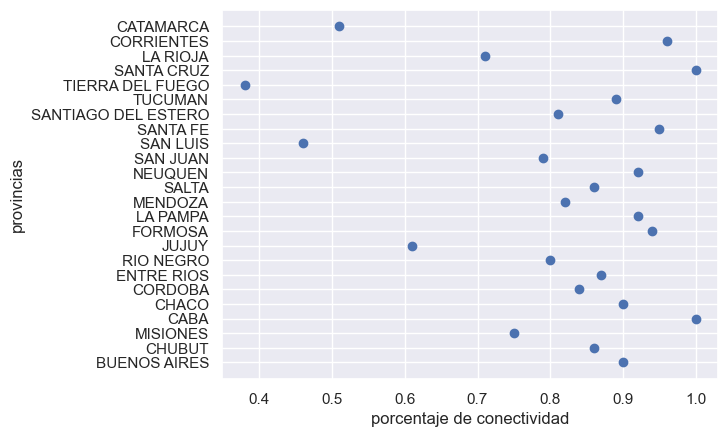

In [231]:
sns.set()
plt.scatter(prov_data['porcentaje_conexion'], prov_data['provincias'])
plt.xlabel('porcentaje de conectividad')
plt.ylabel('provincias');

In [254]:
prov_data

,provincias,loc_conectadas,loc_sin_conexion,porcentaje_conexion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,4G,3G,TELEFONIAFIJA,WIRELESS,SATELITAL
0,BUENOS AIRES,809,92,0.900000,0.440000,0.430000,0.260000,0.550000,0.810000,0.730000,0.680000,0.610000,0.190000
1,CHUBUT,77,13,0.860000,0.170000,0.140000,0.190000,0.170000,0.490000,0.400000,0.700000,0.400000,0.640000
2,MISIONES,107,36,0.750000,0.270000,0.230000,0.000000,0.360000,0.800000,0.370000,0.550000,0.460000,0.240000
3,CABA,48,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,CHACO,83,9,0.900000,0.340000,0.170000,0.010000,0.540000,0.900000,0.530000,0.570000,0.550000,0.520000
5,CORDOBA,465,91,0.840000,0.390000,0.190000,0.010000,0.370000,0.740000,0.600000,0.670000,0.630000,0.160000
6,ENTRE RIOS,168,26,0.870000,0.280000,0.230000,0.020000,0.260000,0.760000,0.460000,0.760000,0.770000,0.130000
7,RIO NEGRO,131,32,0.800000,0.180000,0.090000,0.160000,0.340000,0.500000,0.420000,0.400000,0.610000,0.530000
8,JUJUY,98,62,0.610000,0.200000,0.150000,0.000000,0.450000,0.460000,0.290000,0.370000,0.400000,0.450000
9,FORMOSA,59,4,0.940000,0.220000,0.050000,0.000000,0.270000,0.710000,0.270000,0.510000,1.000000,0.390000


Hay provincias en las cuales la conexion a internet es casi o completa como en CABA, SANTA CRUZ, CORRIENTES, SANTA FE.
Y otras en las que no cuentan con mucha conectividad como CATAMARCA, LA RIOJA, SAN LUIS. Esto puede deberse a distintos factores, pero antes de sacar conclusiones sigamos analizando un poco mas a detalle

Veamos como se comportan las conexiones por tecnología a nivel provincial

In [233]:
conexiones = ['ADSL','CABLEMODEM', 'DIALUP', 'FIBRAOPTICA', '4G', '3G', 'TELEFONIAFIJA', 'WIRELESS', 'SATELITAL']
for provincia in prov_data['provincias']:
    for conexion in conexiones:
        prov_data.loc[prov_data['provincias'] == provincia, conexion] = df_conectividad_por_localidad.loc[(df_conectividad_por_localidad['Provincia'] == provincia) & (df_conectividad_por_localidad[conexion] == 'SI')].count()[0]

for conexion in conexiones:
    prov_data[conexion] = round(prov_data[conexion] / prov_data['loc_conectadas'], 2)

In [234]:
prov_data.head(3)

,provincias,loc_conectadas,loc_sin_conexion,porcentaje_conexion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,4G,3G,TELEFONIAFIJA,WIRELESS,SATELITAL
0,BUENOS AIRES,809,92,0.900000,0.440000,0.430000,0.260000,0.550000,0.810000,0.730000,0.680000,0.610000,0.190000
1,CHUBUT,77,13,0.860000,0.170000,0.140000,0.190000,0.170000,0.490000,0.400000,0.700000,0.400000,0.640000
2,MISIONES,107,36,0.750000,0.270000,0.230000,0.000000,0.360000,0.800000,0.370000,0.550000,0.460000,0.240000


Ahora basandonos en el gráfico anteriormente realizado, busquemos aquellas provincias cuyo umbral de conexión sea menor a 0.77

In [235]:
prov_data.loc[prov_data['porcentaje_conexion'] < 0.77]

,provincias,loc_conectadas,loc_sin_conexion,porcentaje_conexion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,4G,3G,TELEFONIAFIJA,WIRELESS,SATELITAL
2,MISIONES,107,36,0.750000,0.270000,0.230000,0.000000,0.360000,0.800000,0.370000,0.550000,0.460000,0.240000
8,JUJUY,98,62,0.610000,0.200000,0.150000,0.000000,0.450000,0.460000,0.290000,0.370000,0.400000,0.450000
15,SAN LUIS,105,124,0.460000,0.100000,0.070000,0.090000,0.190000,0.390000,0.270000,0.390000,0.840000,0.170000
19,TIERRA DEL FUEGO,6,10,0.380000,0.500000,0.330000,0.330000,0.330000,1.000000,0.830000,0.500000,0.500000,0.670000
21,LA RIOJA,66,27,0.710000,0.200000,0.330000,0.020000,0.440000,0.550000,0.210000,0.530000,0.800000,0.240000
23,CATAMARCA,93,89,0.510000,0.080000,0.030000,0.010000,0.250000,0.610000,0.310000,0.330000,0.350000,0.520000


Conclusiones:

#### `Misiones`:
En Misiones, el porcentaje de conexión es del `75%`, lo que indica una conectividad ligeramente debajo del promedio en general.
Los tipos de ``conexiones predominantes`` en Misiones son ``4G, TELEFONIAFIJA y WIRELESS``, con valores de 0.80, 0.55 y 0.46 respectivamente.
Estos datos sugieren que ``la conectividad en Misiones se encuentra en su mayoria en tecnologías inalámbricas y telefónicas.``. 

#### `Jujuy`:
En Jujuy, el porcentaje de conexión es del `61%`, lo que indica una baja conectividad en general.
Los tipos de ``conexiones predominantes`` en Jujuy ``son FIBRAOPTICA, 4G y SATELITAL``, con valores de 0.45, 0.46 y 0.45 respectivamente.
Estos datos sugieren que ``la conectividad en Jujuy es variada pero faltan llegar a algunas localidades aún.``. 

### ``San Luis``:
San Luis tiene un porcentaje de conexión del 46%, lo que indica una baja conectividad en comparación con otras provincias.
El tipo de ``conexión predominante en San Luis es WIRELESS, con un valor de 0.84``.
Otros tipos de conexiones presentes en San Luis, aunque en menor medida, son ADSL, CABLEMODEM, DIALUP, FIBRAOPTICA, 4G, 3G, TELEFONIAFIJA y SATELITAL, con valores que van desde 0.10 hasta 0.39.
``Estos datos sugieren que en San Luis, la conectividad está principalmente basada en conexiones inalámbricas (WIRELESS)``. Esto indica que la infraestructura de conectividad en la provincia puede depender en gran medida de tecnologías inalámbricas para proporcionar acceso a internet.

### ``Tierra del Fuego``:

Tierra del Fuego tiene un porcentaje de conexión del 38%, lo que indica una baja conectividad en comparación con otras provincias.
``El tipo de conexión predominante en Tierra del Fuego es 4G, con un valor de 1.00``.
Otros tipos de conexiones presentes en Tierra del Fuego, aunque en menor medida, son ADSL, CABLEMODEM, DIALUP, FIBRAOPTICA, 3G, TELEFONIAFIJA y SATELITAL, con valores que van desde 0.33 hasta 0.50.
Estos datos sugieren que en Tierra del Fuego, ``la conectividad está principalmente basada en conexiones móviles de 4G``. Esto indica que la infraestructura de conectividad terrestre en la provincia puede estar enfocada en proporcionar conectividad a través de redes móviles de alta velocidad.

### ``La Rioja``:

En La Rioja, el porcentaje de conexión es del 71%, lo que indica una conectividad relativamente mejor en comparación con las provincias anteriores.
El tipo de conexión predominante en La Rioja es WIRELESS, con un valor de 0.80.
Otros tipos de conexiones presentes en La Rioja, aunque en menor medida, son ADSL, CABLEMODEM, DIALUP, FIBRAOPTICA, 4G, 3G, TELEFONIAFIJA y SATELITAL, con valores que van desde 0.20 hasta 0.55.
Estos datos sugieren que en La Rioja, la conectividad está basada principalmente en conexiones inalámbricas (WIRELESS).

### ``Catamarca``:
Catamarca tiene un porcentaje de conexión del 51%, lo que indica una conectividad moderada en comparación con las otras provincias mencionadas.
Los tipos de conexiones más predominantes en Catamarca son 4G, SATELITAL, con valores de 0.61 y 0.52 respectivamente.
Estos datos sugieren que en Catamarca, la conectividad se basa en conexiones 4G y SATELITAL.

Un factor que puede ser indicativo de la baja conectividad a nivel provincial puede ser dada debido a la falta de disponibilidad de redes alternativas a las telefónicas o inalambricas, así como también la falta de infraestructura para la implementación de las mismas.


# Provincias con menor alcance de Fibra Óptica

Siendo la Fibra Óptica el mejor medio actualmente para la transmisión de información veamos cuales son aquellas provincias con menor disposición de esta tecnología a ver si podemos ver alguna relacion o información interesante

In [236]:
prov_data.sort_values('FIBRAOPTICA', ascending=True).head(5)

,provincias,loc_conectadas,loc_sin_conexion,porcentaje_conexion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,4G,3G,TELEFONIAFIJA,WIRELESS,SATELITAL
14,SAN JUAN,85,23,0.790000,0.110000,0.010000,0.130000,0.140000,0.580000,0.480000,0.470000,0.860000,0.210000
22,CORRIENTES,75,3,0.960000,0.280000,0.120000,0.010000,0.160000,0.930000,0.520000,0.680000,0.600000,0.730000
1,CHUBUT,77,13,0.860000,0.170000,0.140000,0.190000,0.170000,0.490000,0.400000,0.700000,0.400000,0.640000
18,TUCUMAN,104,13,0.890000,0.290000,0.090000,0.010000,0.190000,0.860000,0.670000,0.580000,0.480000,0.140000
15,SAN LUIS,105,124,0.460000,0.100000,0.070000,0.090000,0.190000,0.390000,0.270000,0.390000,0.840000,0.170000


Podemos observar que en aquellas provincias cuya conectivad de Fibra Óptica es baja, tiende a prevalecer las conexiones telefónicas, como el 4g, o tecnologías inalámbricas: Satelital y Wireless

# Ingresos por la prestacion del servicio de internet

Realizemos un análisis de los ingresos por la prestacion del servicio de internet

In [237]:
ingresos_trim = pd.read_csv('data/Internet_Ingresos_trimestrales.csv')
ingresos_trim.head(10)

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,3,67.055.930,Jul-Sept 2022
1,2022,2,60.335.724,Abr-Jun 2022
2,2022,1,55.589.997,Ene-Mar 2022
3,2021,4,45.467.887,Oct-Dic 2021
4,2021,3,42.999.944,Jul-Sept 2021
5,2021,2,38.239.667,Abr-Jun 2021
6,2021,1,36.676.371,Ene-Mar 2021
7,2020,4,33.539.703,Oct-Dic 2020
8,2020,3,31.997.445,Jul-Sept 2020
9,2020,2,32.102.476,Abr-Jun 2020


A simple vista podemos notar que a medida que aumenta el año tambien los ingresos, esto sugiere a que puede haber una relación lineal entre estas variables. Debido a esto realizaremos un modelo que nos ayude a estimar el ingreso del proximo trimestre

In [238]:
ingresos_trim.dtypes

Año                           int64
Trimestre                     int64
Ingresos (miles de pesos)    object
Periodo                      object
dtype: object

Cambiamos el formato y tipo de los datos para realizar nuestro análisis

In [239]:
ingresos_trim['Ingresos (miles de pesos)'] = ingresos_trim['Ingresos (miles de pesos)'].str.replace('.','')
ingresos_trim['Ingresos (miles de pesos)'] = ingresos_trim['Ingresos (miles de pesos)'].astype(int)

Creamos la columna index la cual nos ayudará con el modelo al darle una relación mas lineal a los datos

In [240]:
ingresos_trim['index'] = sorted(ingresos_trim.index, reverse=True)

In [241]:
ingresos_trim.head(5)

,Año,Trimestre,Ingresos (miles de pesos),Periodo,index
0,2022,3,67055930,Jul-Sept 2022,34
1,2022,2,60335724,Abr-Jun 2022,33
2,2022,1,55589997,Ene-Mar 2022,32
3,2021,4,45467887,Oct-Dic 2021,31
4,2021,3,42999944,Jul-Sept 2021,30


Creamos nuestro dataframe que utilizaremos para el modelo

In [242]:
model_data = ingresos_trim[['Ingresos (miles de pesos)','index']].copy()

In [243]:
mapa = model_data.corr()
mapa.style.background_gradient(cmap='coolwarm')

,Ingresos (miles de pesos),index
Ingresos (miles de pesos),1.000000,0.929345
index,0.929345,1.000000


Importamos las librerías necesarias para realizar el modelo

In [244]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

Definimos las variables independientes y la objetivo

In [245]:
x2 = model_data['index'].values
X = x2.reshape(-1,1)
y = model_data['Ingresos (miles de pesos)'].values

Transformamos la variable independiente para que está sea adecuada para la regresión polinómica

In [246]:
poly = PolynomialFeatures(8, include_bias=False)

Xpol = poly.fit_transform(X)

In [247]:
# Instanciamos un nuevo modelo de regresión lineal, pero ahora tendrá los atributos polinómicos que definimos en la celda anterior
reg_2 = LinearRegression()

# Entrenamos la regresión con los atributos X polinómicos 
reg_2.fit(Xpol, y)

y_pred = reg_2.predict(Xpol)

Notemos que el modelo fue entrenado con la totalidad de los datos, esto se debe a que debido a la poca cantidad de datos que tenemos, y que queremos predecir lo mas exactamente los ingresos proximos con los datos que contamos

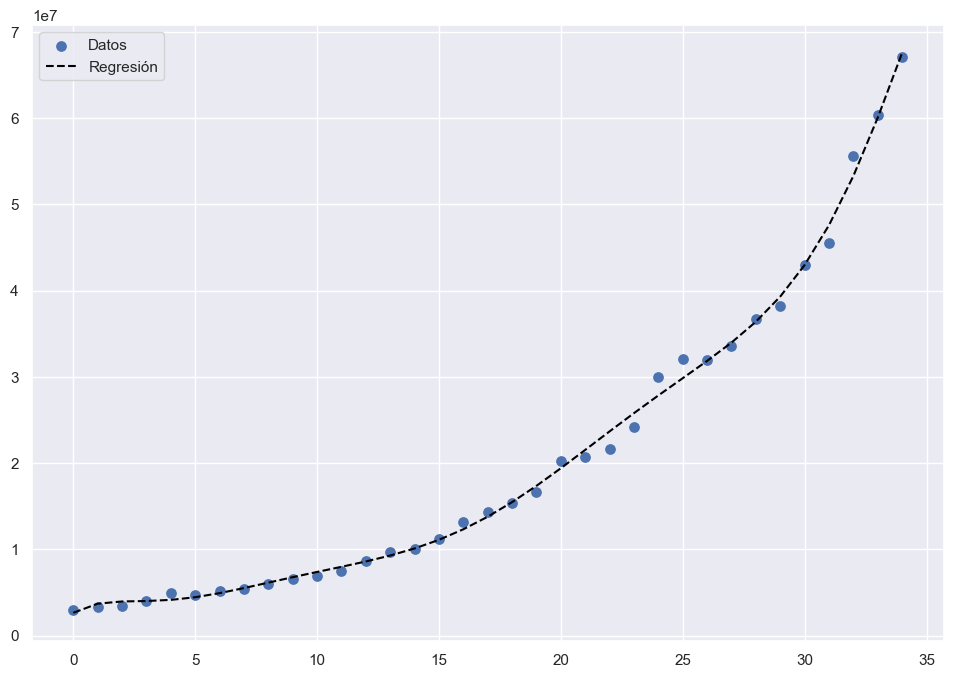

In [248]:
plt.figure(figsize = (40,8))
plt.subplot(1,3,1)
plt.scatter(X,y, s = 45, label = 'Datos')

list1, list2 = zip(*sorted(zip(Xpol[:,0], y_pred)))
plt.plot(list1, list2, '--', label ='Regresión', color='black')
plt.legend();

Realizamos la predicción del proximo trimestre en función a nuestro modelo

In [249]:
proximo_trim = poly.fit_transform([[35]])
proximo_trim = (reg_2.predict(proximo_trim))

In [250]:
proximo_trim[0]

75091660.41879335

Se estima un ingreso de 75.091.660 para el 4to trimestre del 2022.

In [251]:
prov_data.to_csv('outputData/porcentaje_conexion.csv',index=False)

Exportamos nuestra predicción para utilizarla en el dashboard

In [252]:
prediccion = {'valor': [int(proximo_trim[0])]}
prediccion_ing_prox_trim = pd.DataFrame(prediccion)

In [253]:
prediccion_ing_prox_trim.to_csv('outputData/prediccion.csv', index=False)

Con los datos del análisis y teniendo un panorama mas general del mercado ondaremos mas profundamente el análisis en conjunto con el dashboard.